# Assignment 2

The assignment consist of three parts:
- The relation of meansteps per participant with at least 2 other quantitative variables
- The relation of mean steps per participant with a qualitative variable with two levels
- The relation between two qualitative variables

First, we will do some pre-processing steps to import the two data frames and merge them together into one data frame. 


In [1]:
# Import all the necessary library's
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats.stats import pearsonr

# Read the csv file of the daily amount of steps in order to display the table
steps_csv = pd.read_csv('steps.csv', sep=";")
steps_csv = steps_csv.fillna(0)
steps_csv.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Read the csv file of the participants data in order to display the table
survey_csv = pd.read_csv('survey.csv')
survey_csv.head(5)

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [3]:
# Calculate the Mean steps per participant
steps_csv['Mean'] = steps_csv.loc[:, '20-6-2013':'13-5-2014'].mean(numeric_only=True, axis=1)
print(steps_csv)

      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        0.0        0.0        0.0        0.0     3941.0    15733.0   
1      2        0.0        0.0    10473.0      705.0     4287.0     5507.0   
2      3        0.0    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        0.0        0.0        0.0        0.0        0.0        0.0   
4      5        0.0        0.0        0.0        0.0        0.0        0.0   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        0.0     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        0.0        0.0        0.0        0.0        0.0        0.0   
926  927        0.0        0.0        0.0     1623.0        0.0        0.0   
927  928        0.0        0.0    14411.0    14364.0    26629.0    13092.0   
928  929        0.0     3324.0     4507.0    14364.0     4098.0     7299.0   

     26-6-2013  27-6-2013  28-6-2013  ...  5-5-2014  6-5-2014  

In [4]:
# Merge the two dataframes into one dataframe
combined_df = pd.merge(steps_csv, survey_csv, on = 'id')
print(combined_df)

      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        0.0        0.0        0.0        0.0     3941.0    15733.0   
1      2        0.0        0.0    10473.0      705.0     4287.0     5507.0   
2      3        0.0    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        0.0        0.0        0.0        0.0        0.0        0.0   
4      5        0.0        0.0        0.0        0.0        0.0        0.0   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        0.0     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        0.0        0.0        0.0        0.0        0.0        0.0   
926  927        0.0        0.0        0.0     1623.0        0.0        0.0   
927  928        0.0        0.0    14411.0    14364.0    26629.0    13092.0   
928  929        0.0     3324.0     4507.0    14364.0     4098.0     7299.0   

     26-6-2013  27-6-2013  28-6-2013  ...  13-5-2014         Me

# The relation of meansteps per participant

First, we will create a subset of the dataframe in order to display the mean steps per participant with two other qualitative variables. However, we discovered some (unrealistic) outliers at each variable. For example, it is very uncommon that a person's length is lower than 100. So those outcomes are removed. 

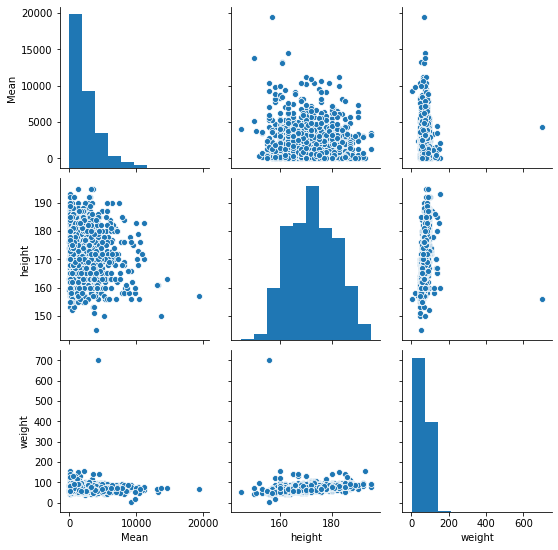

In [5]:
# The original subset with 'Mean', 'height' and 'weight'
df_subset = combined_df[['Mean', 'height', 'weight']]
sns.pairplot(df_subset)
plt.show() 

In order to remove the outliers, there are three methods created. These methods check if a value is above/below a certain value. If so, the value will be replaced with 'NaN'. 

In [6]:
# Removes the outliers in weight
def above_200(x):
    if(x > 200): 
        return float('NaN')
    else: 
        return x

combined_df['weight'] = combined_df['weight'].apply(above_200)

# Removes the outliers in height
def below_100(x):
    if(x < 100): 
        return float('NaN')
    else: 
        return x

combined_df['height'] = combined_df['height'].apply(above_200)

# Removes the outliers in mean
def above_12500(x):
    if(x > 12500): 
        return float('NaN')
    else: 
        return x

combined_df['Mean'] = combined_df['Mean'].apply(above_12500)

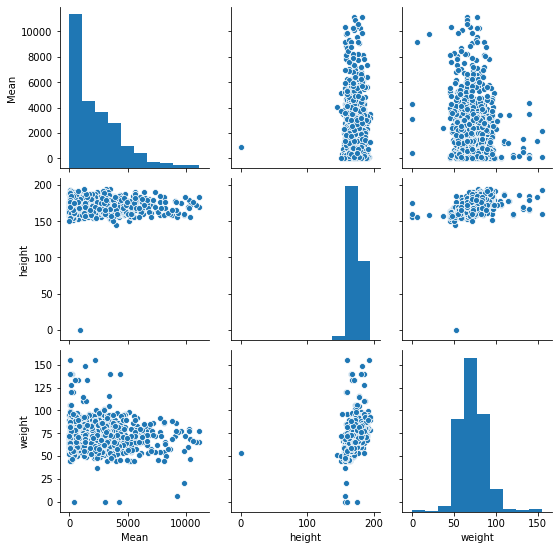

In [30]:
# A new plot with all the outliers removed
df_subset = combined_df[['Mean', 'height', 'weight']]
sns.pairplot(df_subset)
plt.show() 

In [8]:
# Replace all the 'NaN' values with zero
combined_df = combined_df.fillna(0)
corr = combined_df[['Mean', 'height', 'weight']].corr()
corr

,Mean,height,weight
Mean,1.000000,-0.024652,-0.102616
height,-0.024652,1.000000,0.452081
weight,-0.102616,0.452081,1.000000


- Between the 'Mean' and the 'height' there is a weak negative linear correlation
- Between the 'Mean and the 'weight' there is a weak negative linear correlation
- Between the 'weight' and the 'height' there is a moderate positive linear correlation

Below, there is a heatmap which shows these correlations in a visual way.

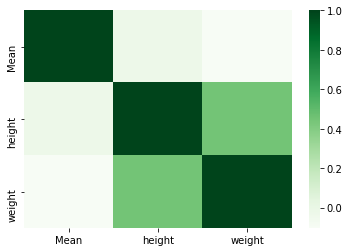

In [27]:
# Create a heathmap 
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap="Greens")
plt.show()

In [10]:
print(pearsonr(combined_df['Mean'],combined_df['height']))
print(pearsonr(combined_df['Mean'],combined_df['weight']))

(-0.024652444246270205, 0.45295566331818654)
(-0.10261583314593024, 0.0017377432122543243)


The first value is the 'r-value', which describes the correlation. The second value is the 'correlation coefficient'
(p-value) which describes if the relation is statistically significant or not. The significance level is described as alpha which is 0.05. So if the p-value > 0.05, it is not statistically significant, otherwise it is. 
- Between 'Mean' and 'height' the r-value is -0.025 and the p-value is 0.453
  Which means there is a weak negative linear correlation and the p-value is statistically significant. 
- Between 'Mean' and 'weight' the r-value is -0.103 and the p-value is 0.0017
  Which means there is a weak negative linear correlation and the p-value is statistically significant. 


# The relation of mean steps per participant 

The relation of mean steps per participant with a qualitative variable with two levels. In this case, I chose for 'gender' 

[Text(0, 0.5, 'Mean steps per participant'), Text(0.5, 0, 'Gender')]

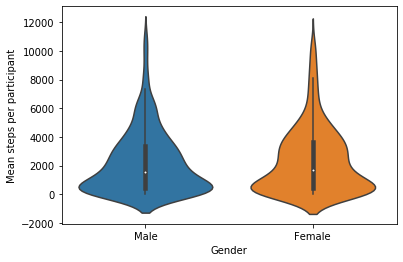

In [29]:
# Create a violin plot
sns.violinplot(data=combined_df, y="Mean", x="gender").set(xlabel='Gender', ylabel='Mean steps per participant')

It seems that there are more men with a higher mean of steps per day. However, the average steps for woman is almost around the same amount of steps (between 2000 and 6000), while the mean of steps per day is more divided by men.
On the section below, it is just an experiment what happens if you use a qualitative variable with more levels). 

[Text(0, 0.5, 'Mean steps per participant'), Text(0.5, 0, 'Age')]

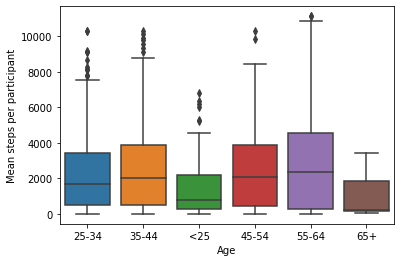

In [28]:
# Create a boxplot
sns.boxplot(data = combined_df, y="Mean",x="age").set(xlabel='Age', ylabel='Mean steps per participant')

# The relation between two qualitative variables

In the first case, we chose City and Gender as the two qualitative variables (categorical values). 

In [13]:
# Create a crosstab
ct = pd.crosstab(combined_df['city'], combined_df['gender']).apply(lambda r: r/r.sum()*100, axis=1)
print(ct)

gender          Female       Male
city                             
Bordeaux     43.410853  56.589147
Lille        50.099010  49.900990
Lyon         46.478873  53.521127
Montpellier  39.215686  60.784314


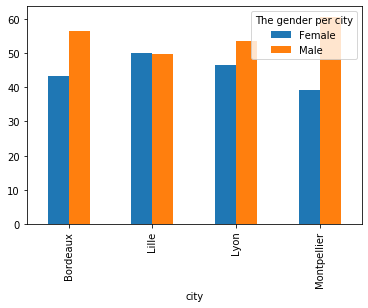

In [14]:
# Create a bar plot
ct.plot.bar(stacked=False)
plt.legend(title='The gender per city')
plt.show()

In this case, we chose City and Education (degree) as the two qualitative variables (categorical values).
In general, there are more men per city, however in Lille there might be more woman than men, but the difference is
small. 

In [15]:
# Create a crosstab
ct = pd.crosstab(combined_df['city'], combined_df['education_1']).apply(lambda r: r/r.sum()*100, axis=1)
print(ct)

education_1   Bachelor  High school  Master or doctorate  No degree   Primary  \
city                                                                            
Bordeaux     42.635659    14.728682            34.883721   0.000000  1.550388   
Lille        39.405941    12.673267            41.782178   0.000000  1.386139   
Lyon         30.985915     8.450704            54.929577   0.704225  2.816901   
Montpellier  38.562092     7.189542            50.980392   0.000000  0.000000   

education_1  Vocational  
city                     
Bordeaux       6.201550  
Lille          4.752475  
Lyon           2.112676  
Montpellier    3.267974  


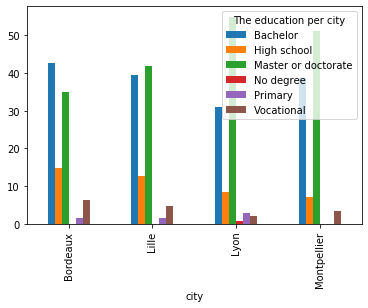

In [24]:
# Create a bar plot
ct.plot.bar(stacked=False)
plt.legend(title='The education per city')
plt.show()

In general, there is a big difference between the degree (level of education) per city. 
In Lyon there a people without any degree, but at the same time it is the city with the 
most people who have a 'master or doctorate'. 